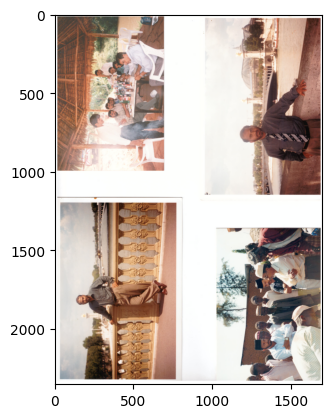

In [101]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

# 1. Read in the scanned image
img = cv2.imread("C:/Users/MebzA/Downloads/test.bmp", cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



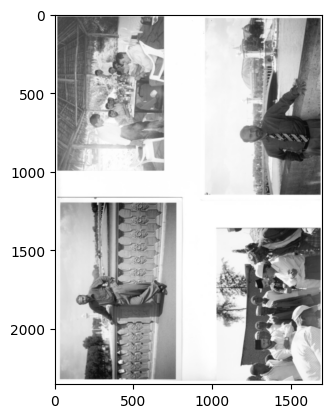

In [84]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))

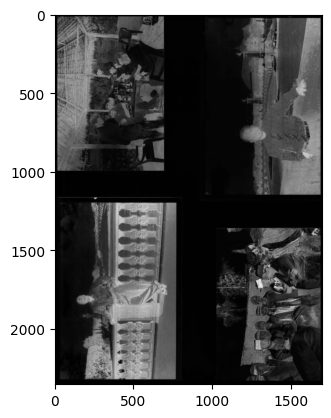

In [94]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
saturation = img_hsv[:, :, 1]

plt.imshow(cv2.cvtColor(saturation, cv2.COLOR_BGR2RGB))

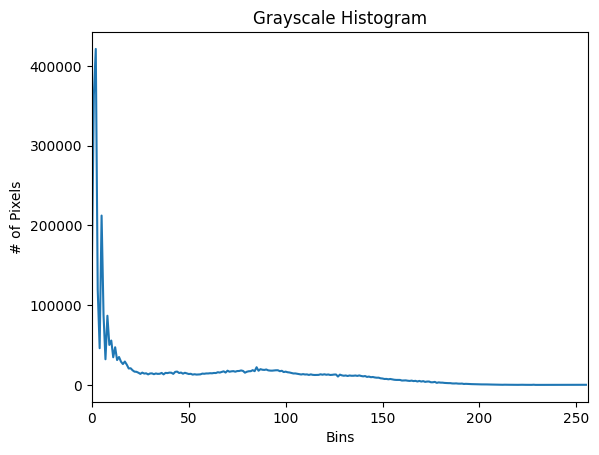

In [95]:
hist = cv2.calcHist([saturation], [0], None, [256], [0, 256])
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

[INFO] otsu's thresholding value: 3.0


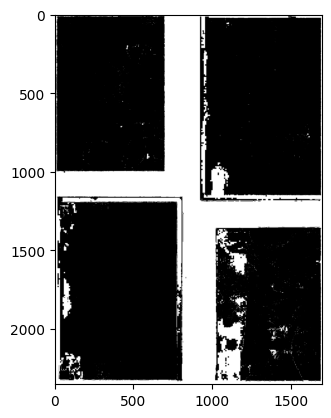

In [150]:
(T, threshInv) = cv2.threshold(saturation, 3, 255,
	cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor(threshInv, cv2.COLOR_BGR2RGB))
print("[INFO] otsu's thresholding value: {}".format(T))

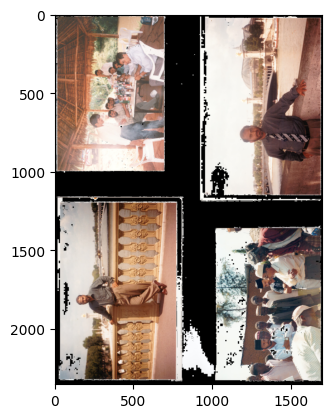

In [105]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(img, img, mask=threshInv)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))

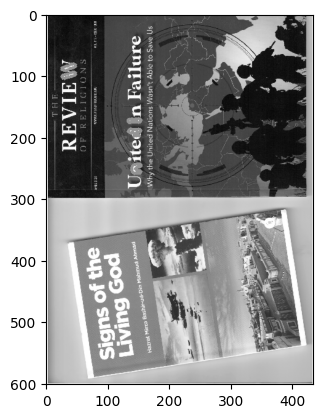

In [35]:


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


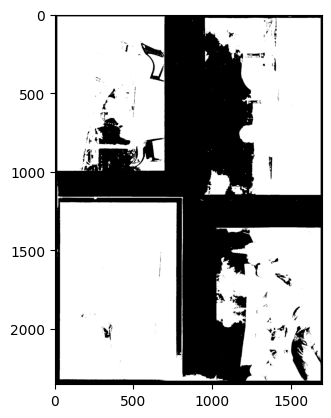

In [93]:
blur_gray= cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV )[1]
plt.imshow(thresh, cmap='gray')


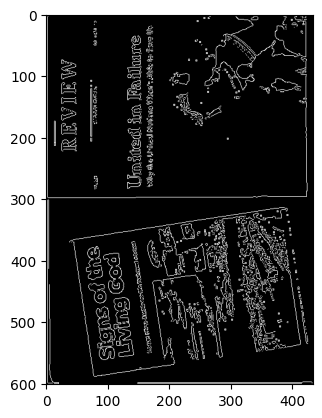

In [89]:
# 2. (Optionally) Denoise/blur + threshold or edge detection
blur = cv2.GaussianBlur(img, (7,7), 1)
edges = cv2.Canny(thresh, 5, 200)

plt.imshow(edges, cmap='gray')

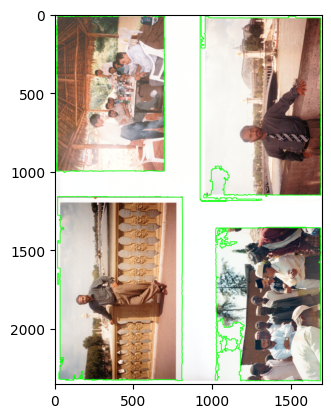

In [132]:

# 3. Find contours
contours, hierarchy = cv2.findContours(threshInv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# find img area
img_area = img.shape[0] * img.shape[1]
# 4. Filter out contours
min_area = img_area/8 # Example threshold, depends on resolution
candidate_contours = []
for c in contours:
    
    area = cv2.contourArea(c)
    
    if area > min_area:
        candidate_contours.append(c)

# show the contours on the image
img_c = img.copy()
cv2.drawContours(img_c, candidate_contours, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))


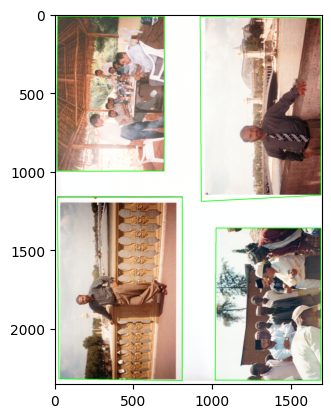

In [133]:

# 5. For each candidate, approximate to see if it’s roughly rectangular
docs = []
for c in candidate_contours:
    # try to turn into rectangle
    peri = cv2.arcLength(c, True)
    for eps in range(1,40,1):
        approx = cv2.approxPolyDP(c, 0.01 * eps * peri, True)
        if len(approx) == 4:
            docs.append(approx)
            continue
        

    
img_c = img.copy()
cv2.drawContours(img_c, docs, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))

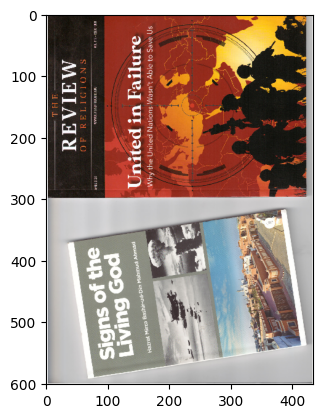

In [65]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

C:\Users\MebzA\AppData\Local\Temp\ipykernel_24480\1398174191.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


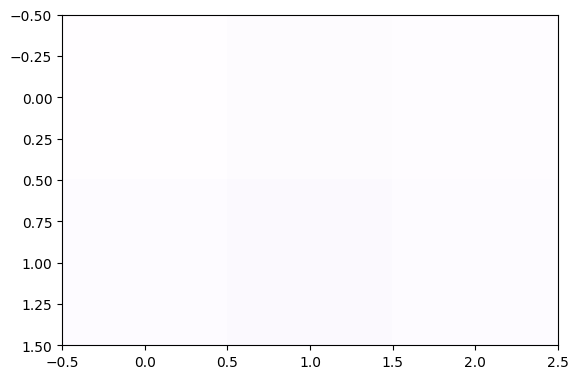

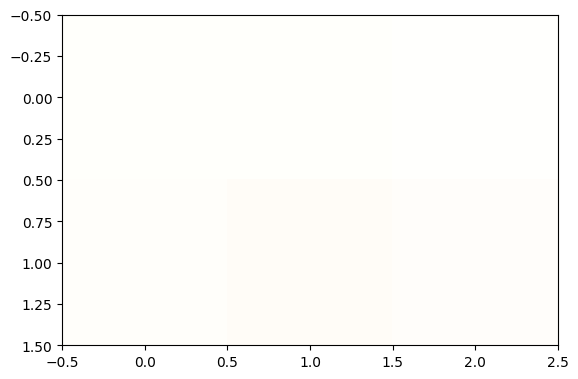

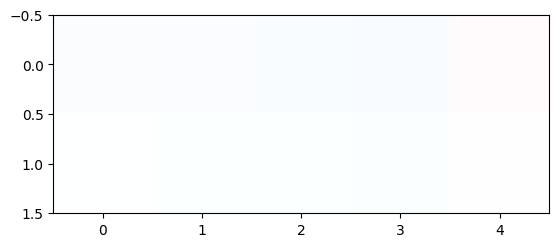

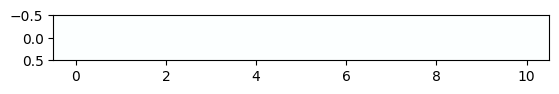

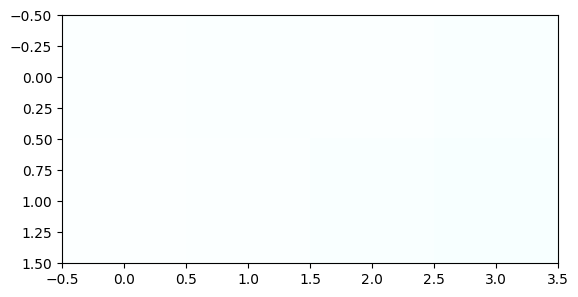

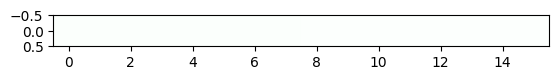

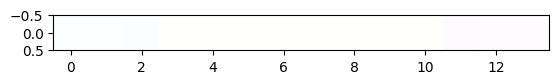

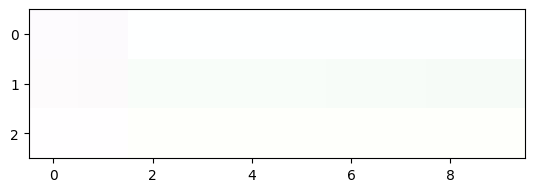

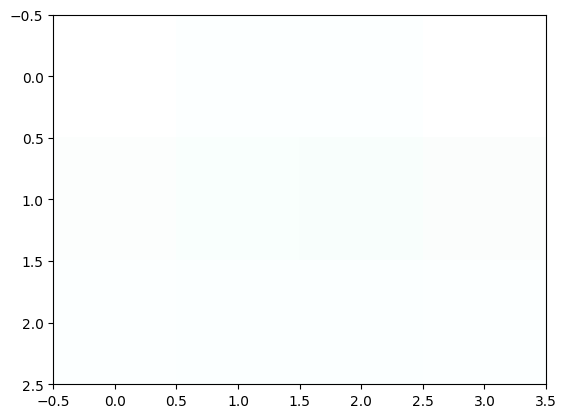

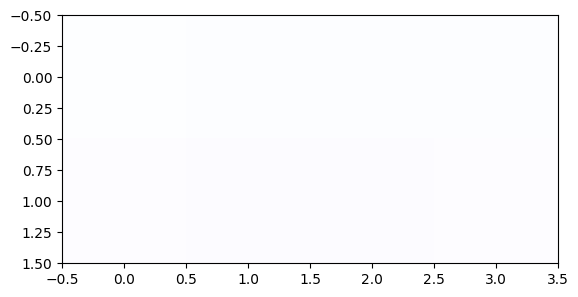

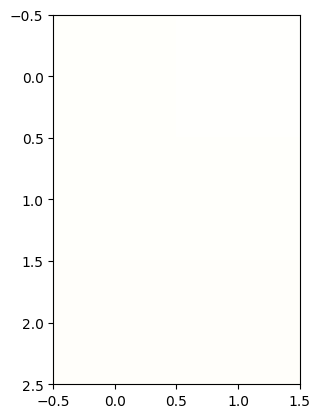

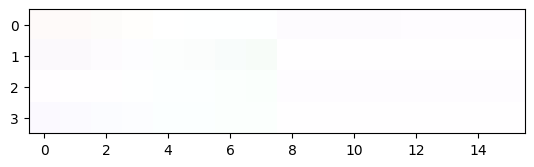

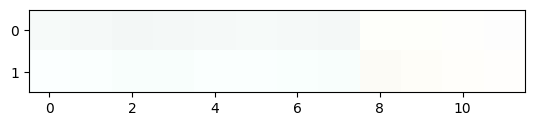

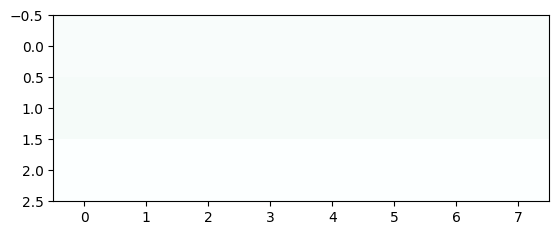

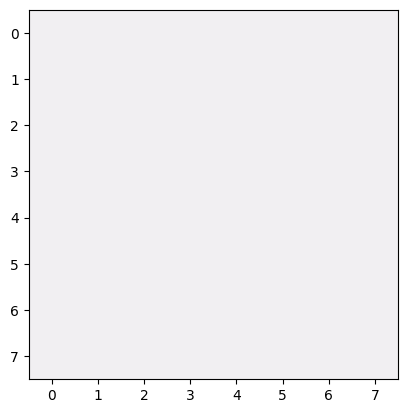

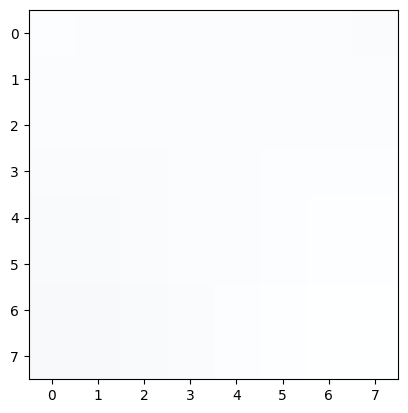

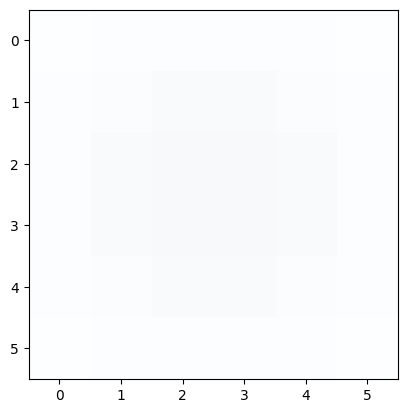

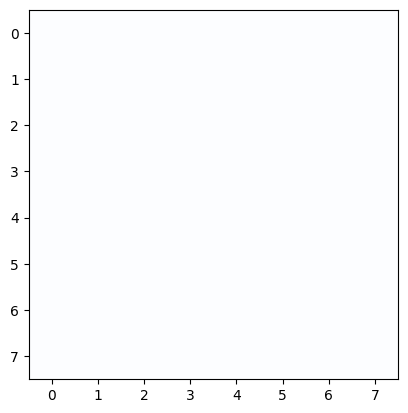

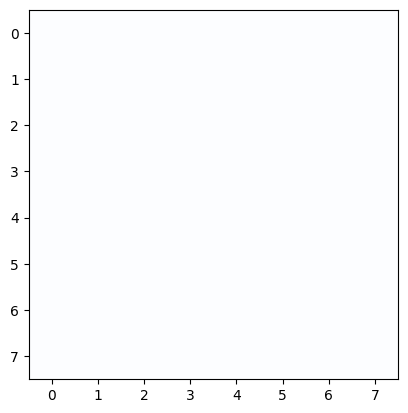

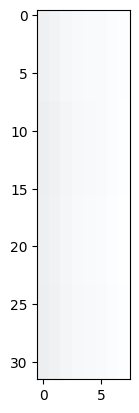

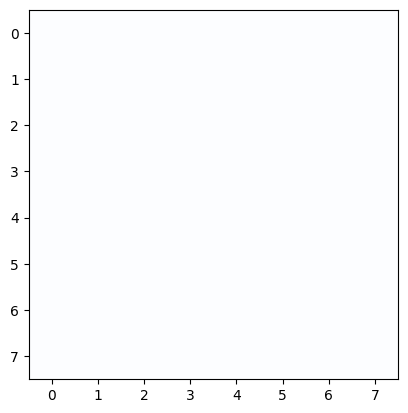

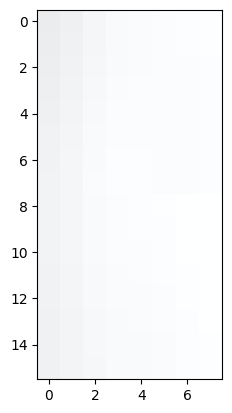

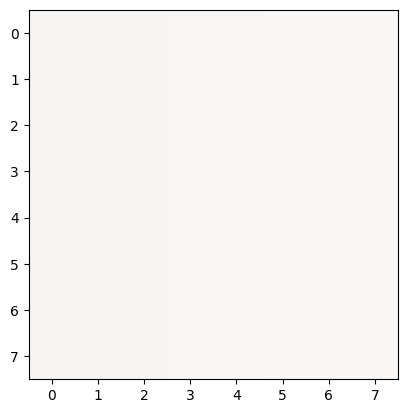

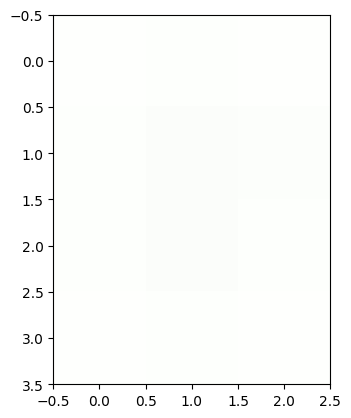

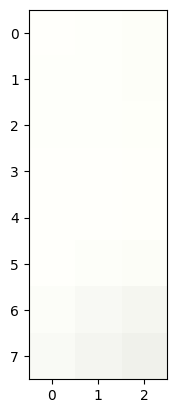

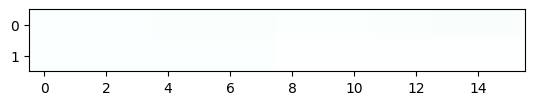

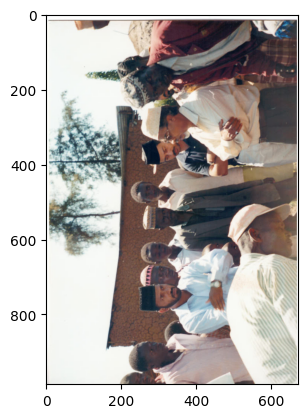

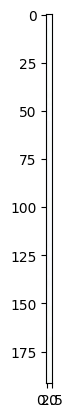

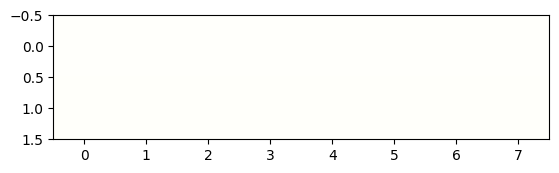

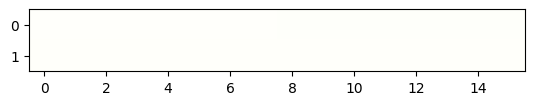

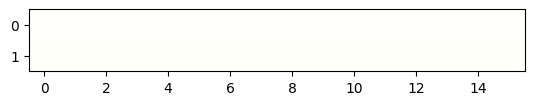

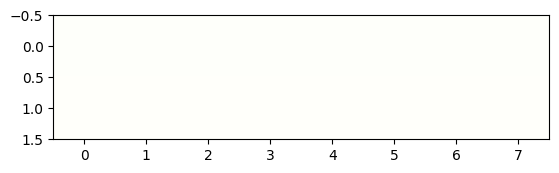

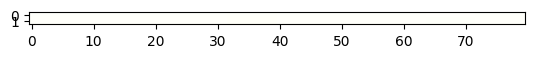

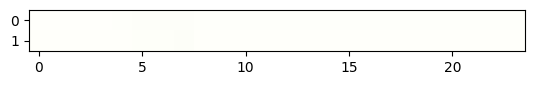

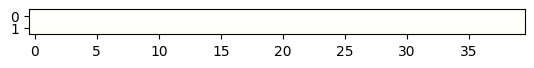

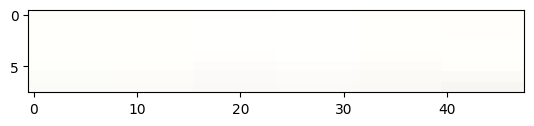

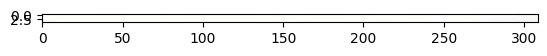

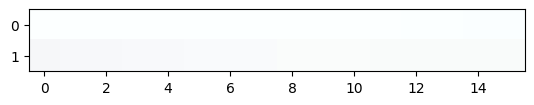

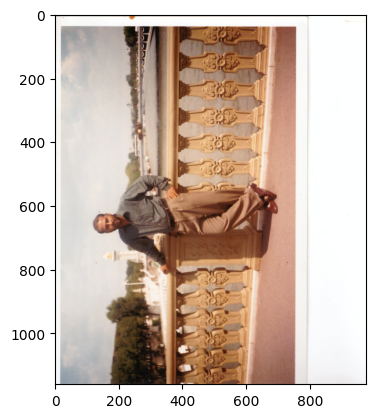

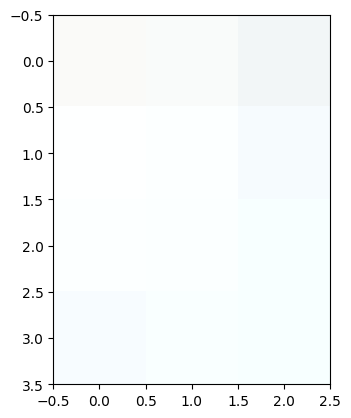

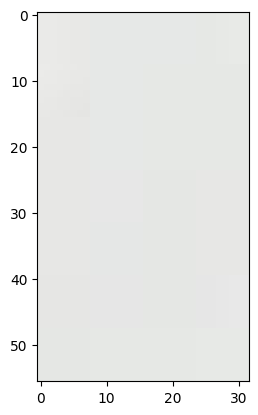

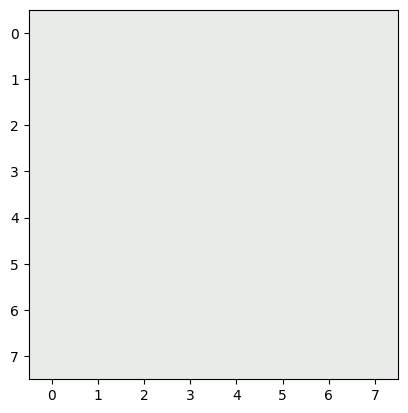

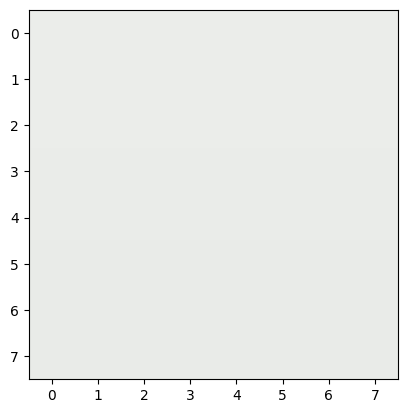

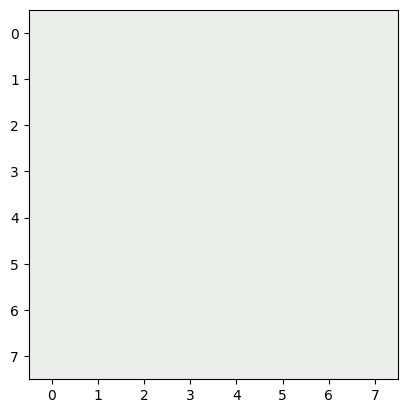

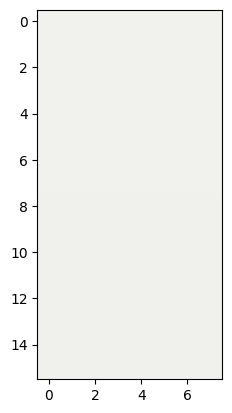

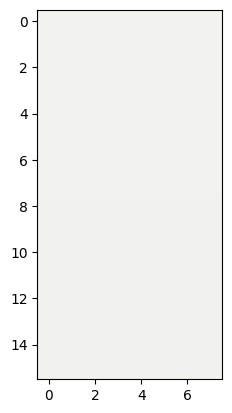

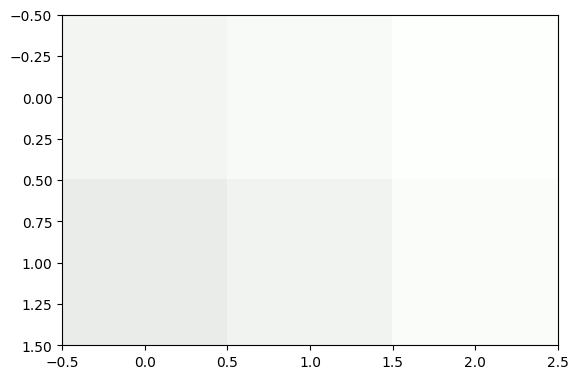

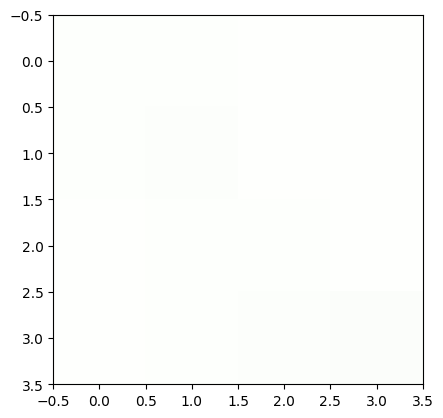

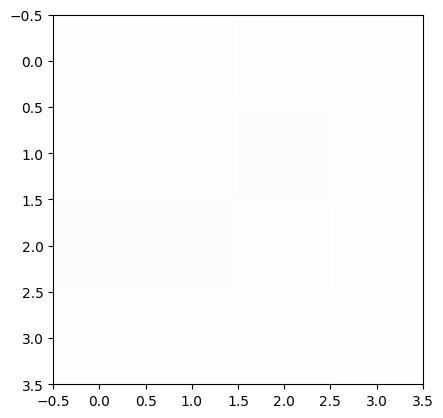

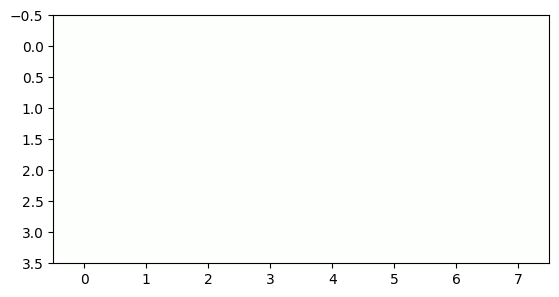

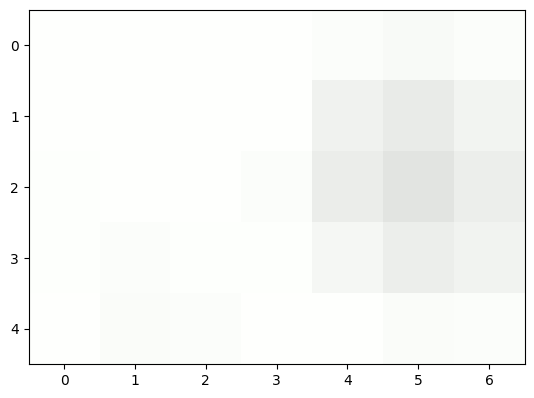

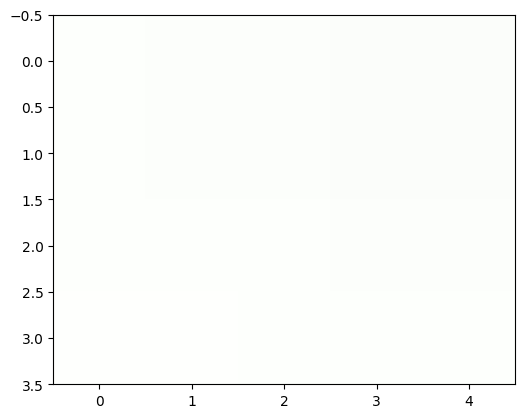

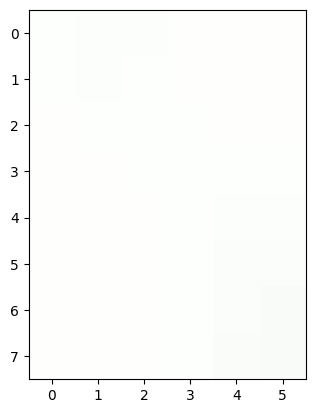

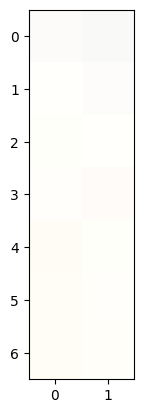

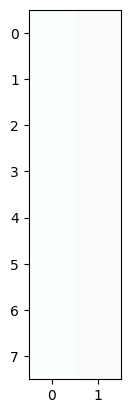

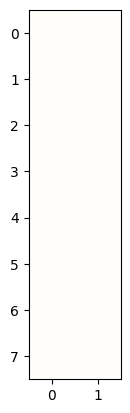

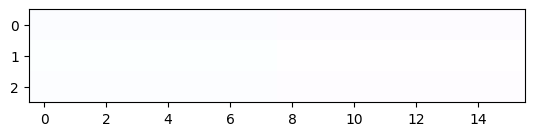

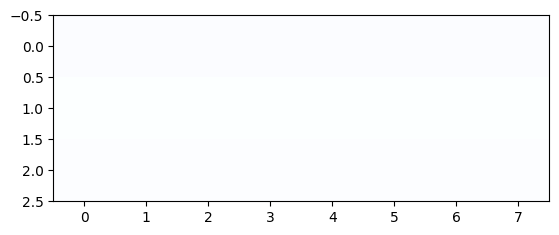

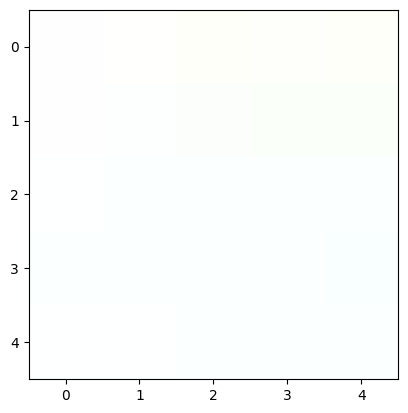

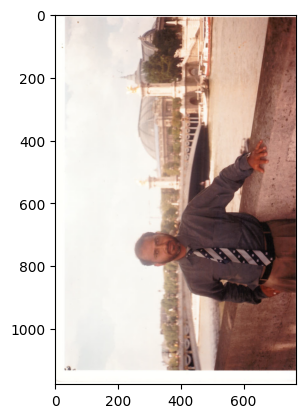

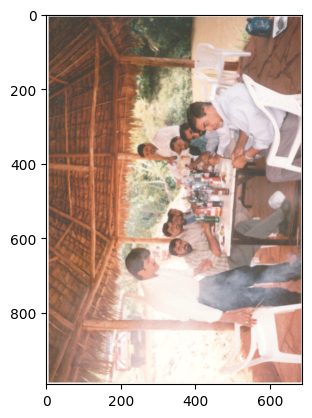

In [116]:

# 6. Get bounding boxes (either axis-aligned or perspective corrected)
# Axis-aligned bounding box approach:
for doc in docs:
    x, y, w, h = cv2.boundingRect(doc)
    cropped = img[y:y+h, x:x+w]
    # Save or process 'cropped'
    # new plot
    plt.figure()	
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    
# print the image to jupyter notebook
# cv2.imshow('image', img)

# (Alternatively, for perspective transform, you’d order the four points 
#  of 'doc' and warp them to a rectangle.)

# Saturation Filter + Contour Detection

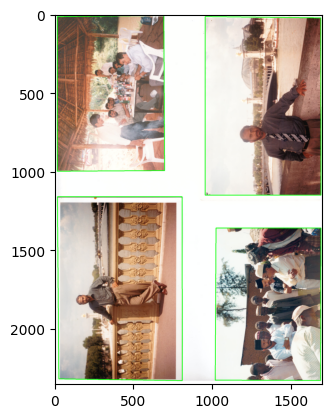

In [159]:
import cv2
from matplotlib import pyplot as plt

# 1. Read in the scanned image
img = cv2.imread("C:/Users/MebzA/Downloads/test.bmp", cv2.IMREAD_COLOR)

# 2. Get saturation channel
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
saturation = img_hsv[:, :, 1]

# 3. Threshhold
(T, threshInv) = cv2.threshold(saturation, 4, 255,
	cv2.THRESH_BINARY)

# 4. Find contours
contours, hierarchy = cv2.findContours(threshInv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# find img area
img_area = img.shape[0] * img.shape[1]
# 5. Filter out contours
min_area = img_area/8 # Example threshold, depends on resolution
candidate_contours = []
for c in contours:
    
    area = cv2.contourArea(c)
    
    if area > min_area:
        candidate_contours.append(c)


# 6. For each candidate, approximate to see if it’s roughly rectangular
docs = []
for c in candidate_contours:
    # try to turn into rectangle
    peri = cv2.arcLength(c, True)
    for eps in range(1,40,1):
        approx = cv2.approxPolyDP(c, 0.01 * eps * peri, True)
        if len(approx) == 4:
            docs.append(approx)
            break
        

    
img_c = img.copy()
cv2.drawContours(img_c, docs, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))

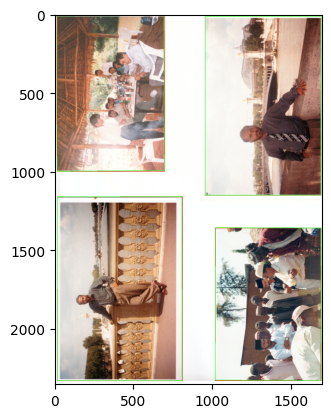

In [156]:
import numpy as np
im_copy = img.copy()
# Assume you have your candidate doc contours stored in docs list
for c in docs:
    # ============= Axis-Aligned Bounding Rectangle =============
    x, y, w, h = cv2.boundingRect(c)
    # Draw it on a copy of your image or the original
    cv2.rectangle(im_copy, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    # ============= Minimal-Area Rotated Rectangle =============
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)        # returns 4 points as floats
    box = np.int32(box)               # convert to integer coords
    cv2.drawContours(im_copy, [box], 0, (0, 255, 0), 2)
    

plt.imshow(cv2.cvtColor(im_copy, cv2.COLOR_BGR2RGB))